In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'

In [3]:
url = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'

In [4]:
player_data = pd.read_html(url, header=1)[0]
player_data = player_data[player_data['Player'] != 'Player']
player_data

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,...,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-032,2000,20.9,25,...,0,4,0.19,4,0,0,0,0,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-130,1987,21.0,13,...,2,0,0.00,0,0,0,0,0,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-316,2000,18.2,20,...,2,0,0.00,0,0,0,0,0,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-004,1993,20.3,32,...,3,2,0.10,1,0,0,0,1,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-299,2000,0.5,0,...,0,0,0.00,0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2641,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-003,1999,14.3,21,...,2,1,0.07,1,0,0,0,0,0,Matches
2746,2642,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-133,1997,13.2,39,...,1,2,0.15,2,0,0,0,0,0,Matches
2747,2643,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-050,1998,14.5,62,...,0,8,0.55,8,0,0,0,0,0,Matches
2748,2644,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-259,1990,10.5,14,...,0,3,0.32,2,0,0,0,1,0,Matches


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

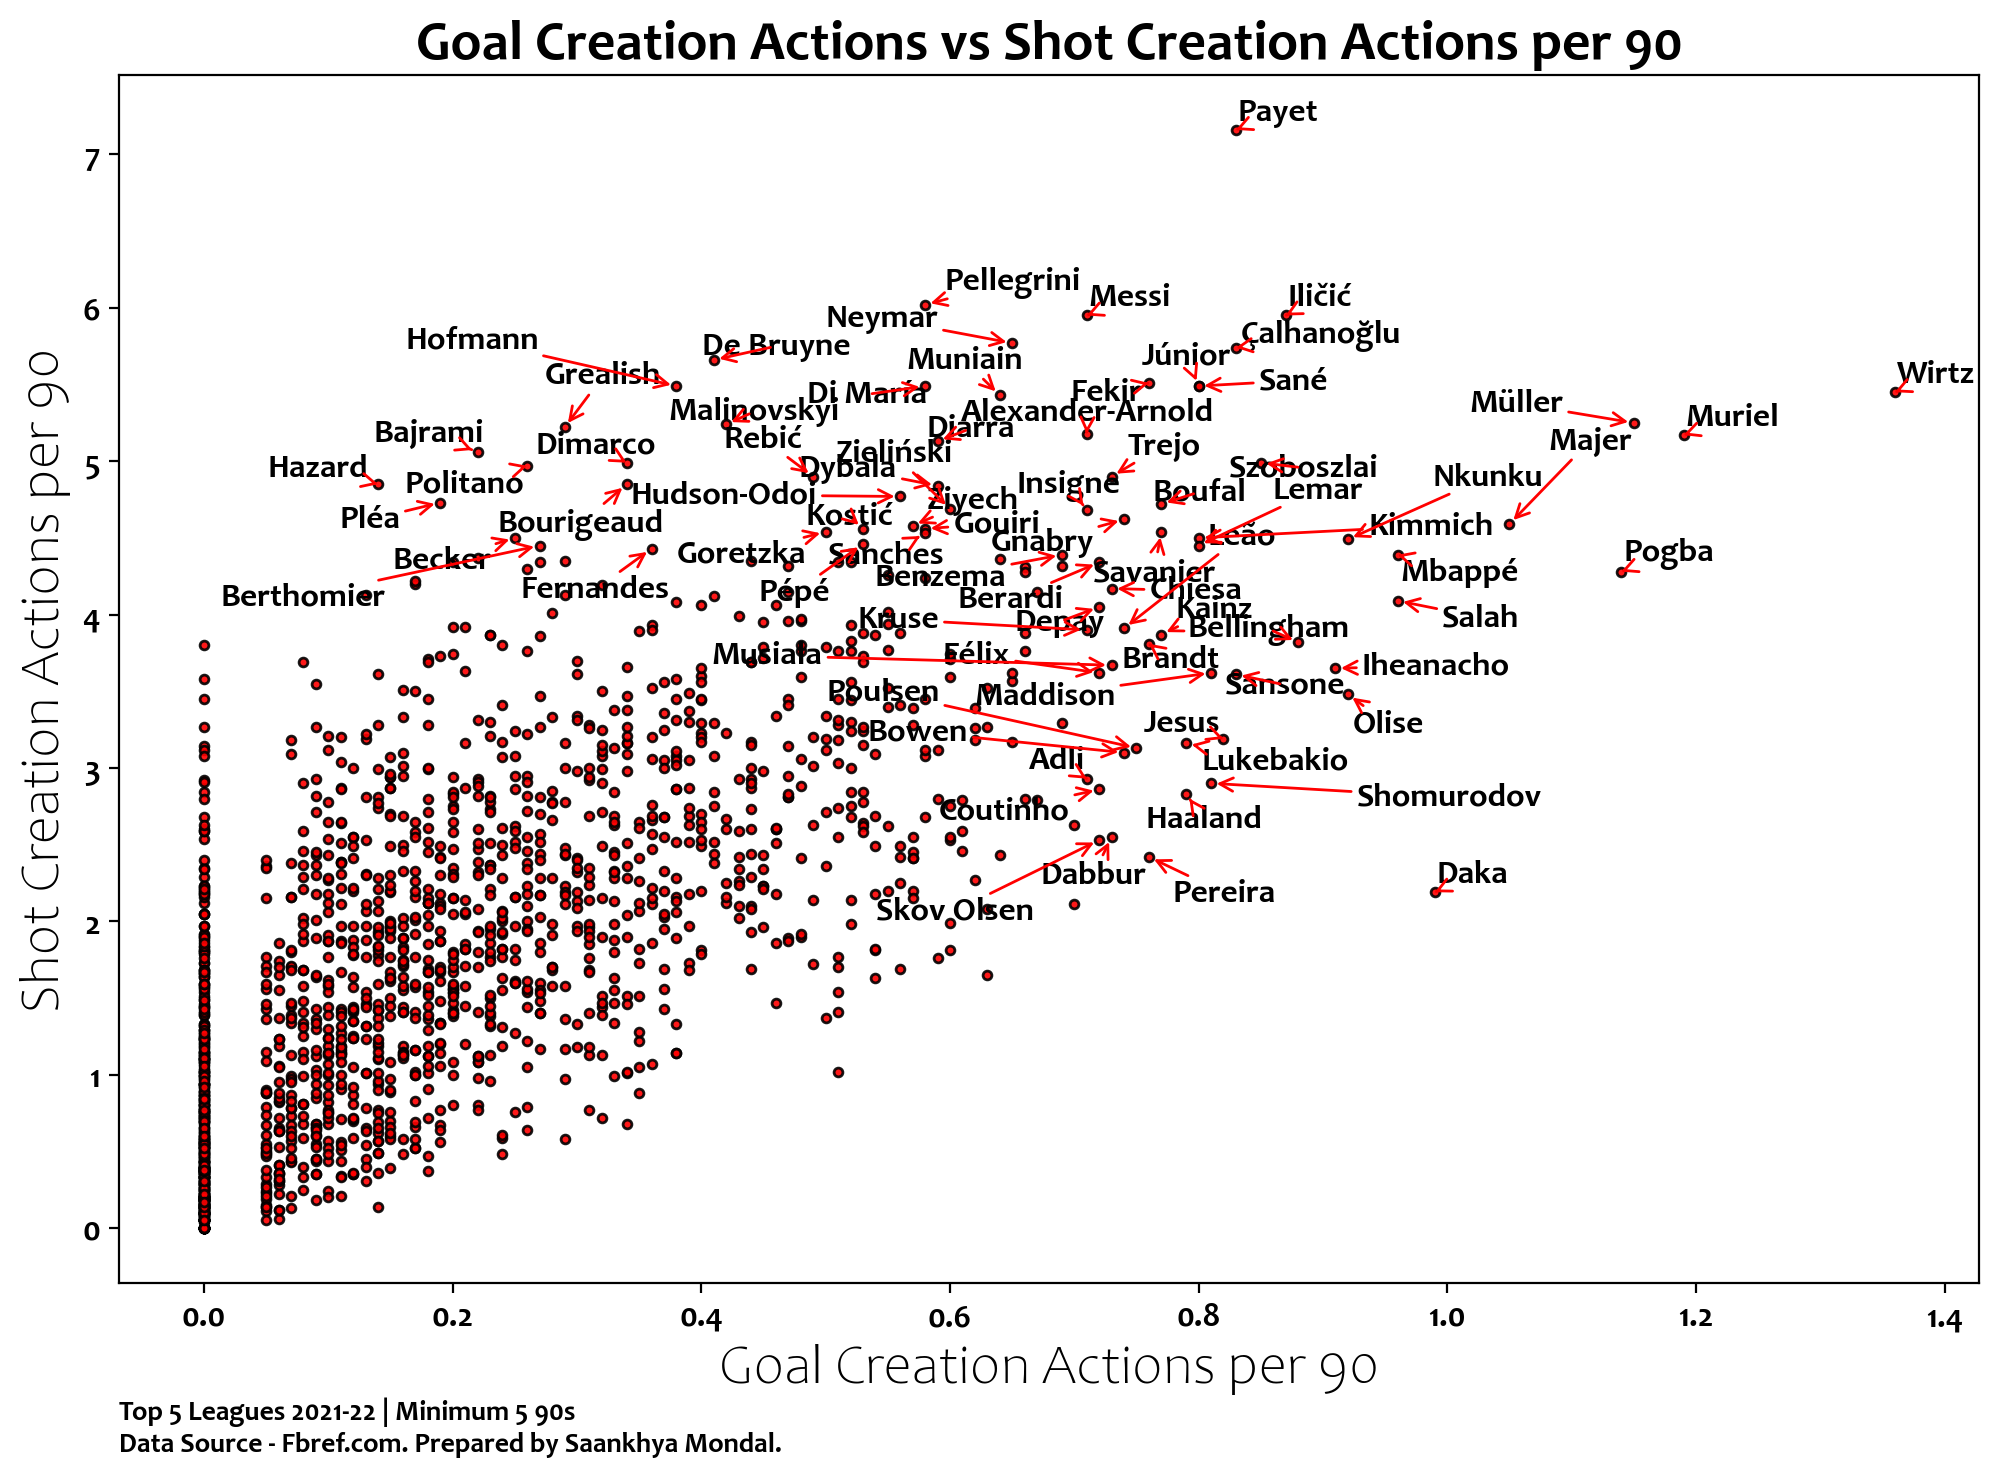

In [5]:
data = player_data[player_data['90s'].astype(float) >= 5.0]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.970)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.970)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [6]:
fig.savefig('Images/GCAp90vsSCAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

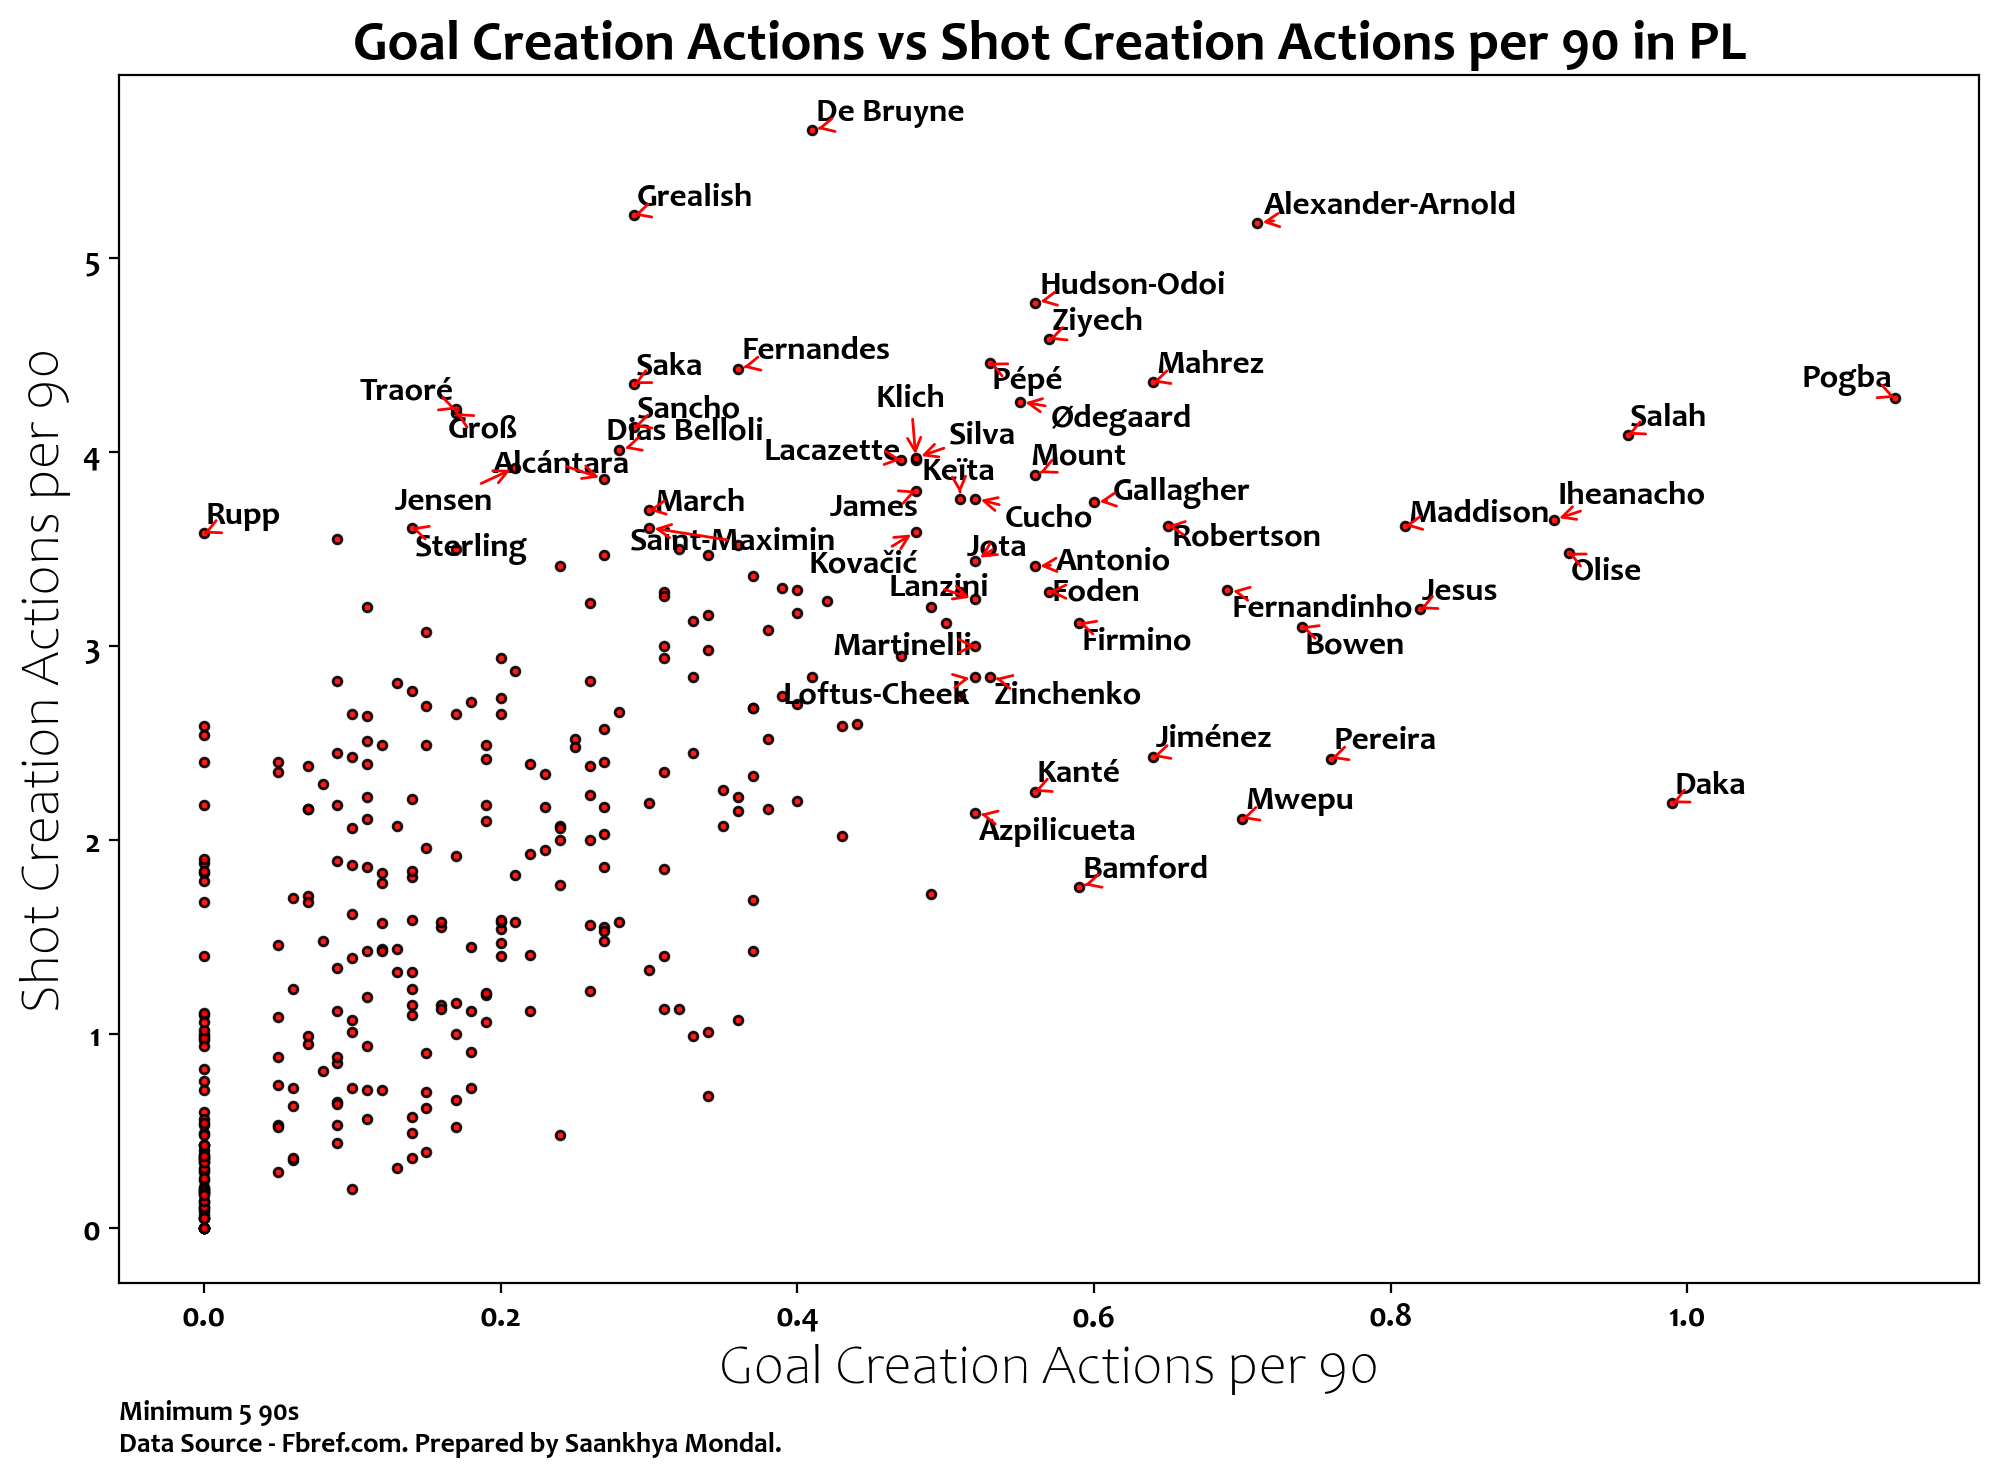

In [7]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[data['Comp'].astype(str).str.contains('eng')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 in PL', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [8]:
fig.savefig('Images/GCAp90vsSCAp90_PL.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

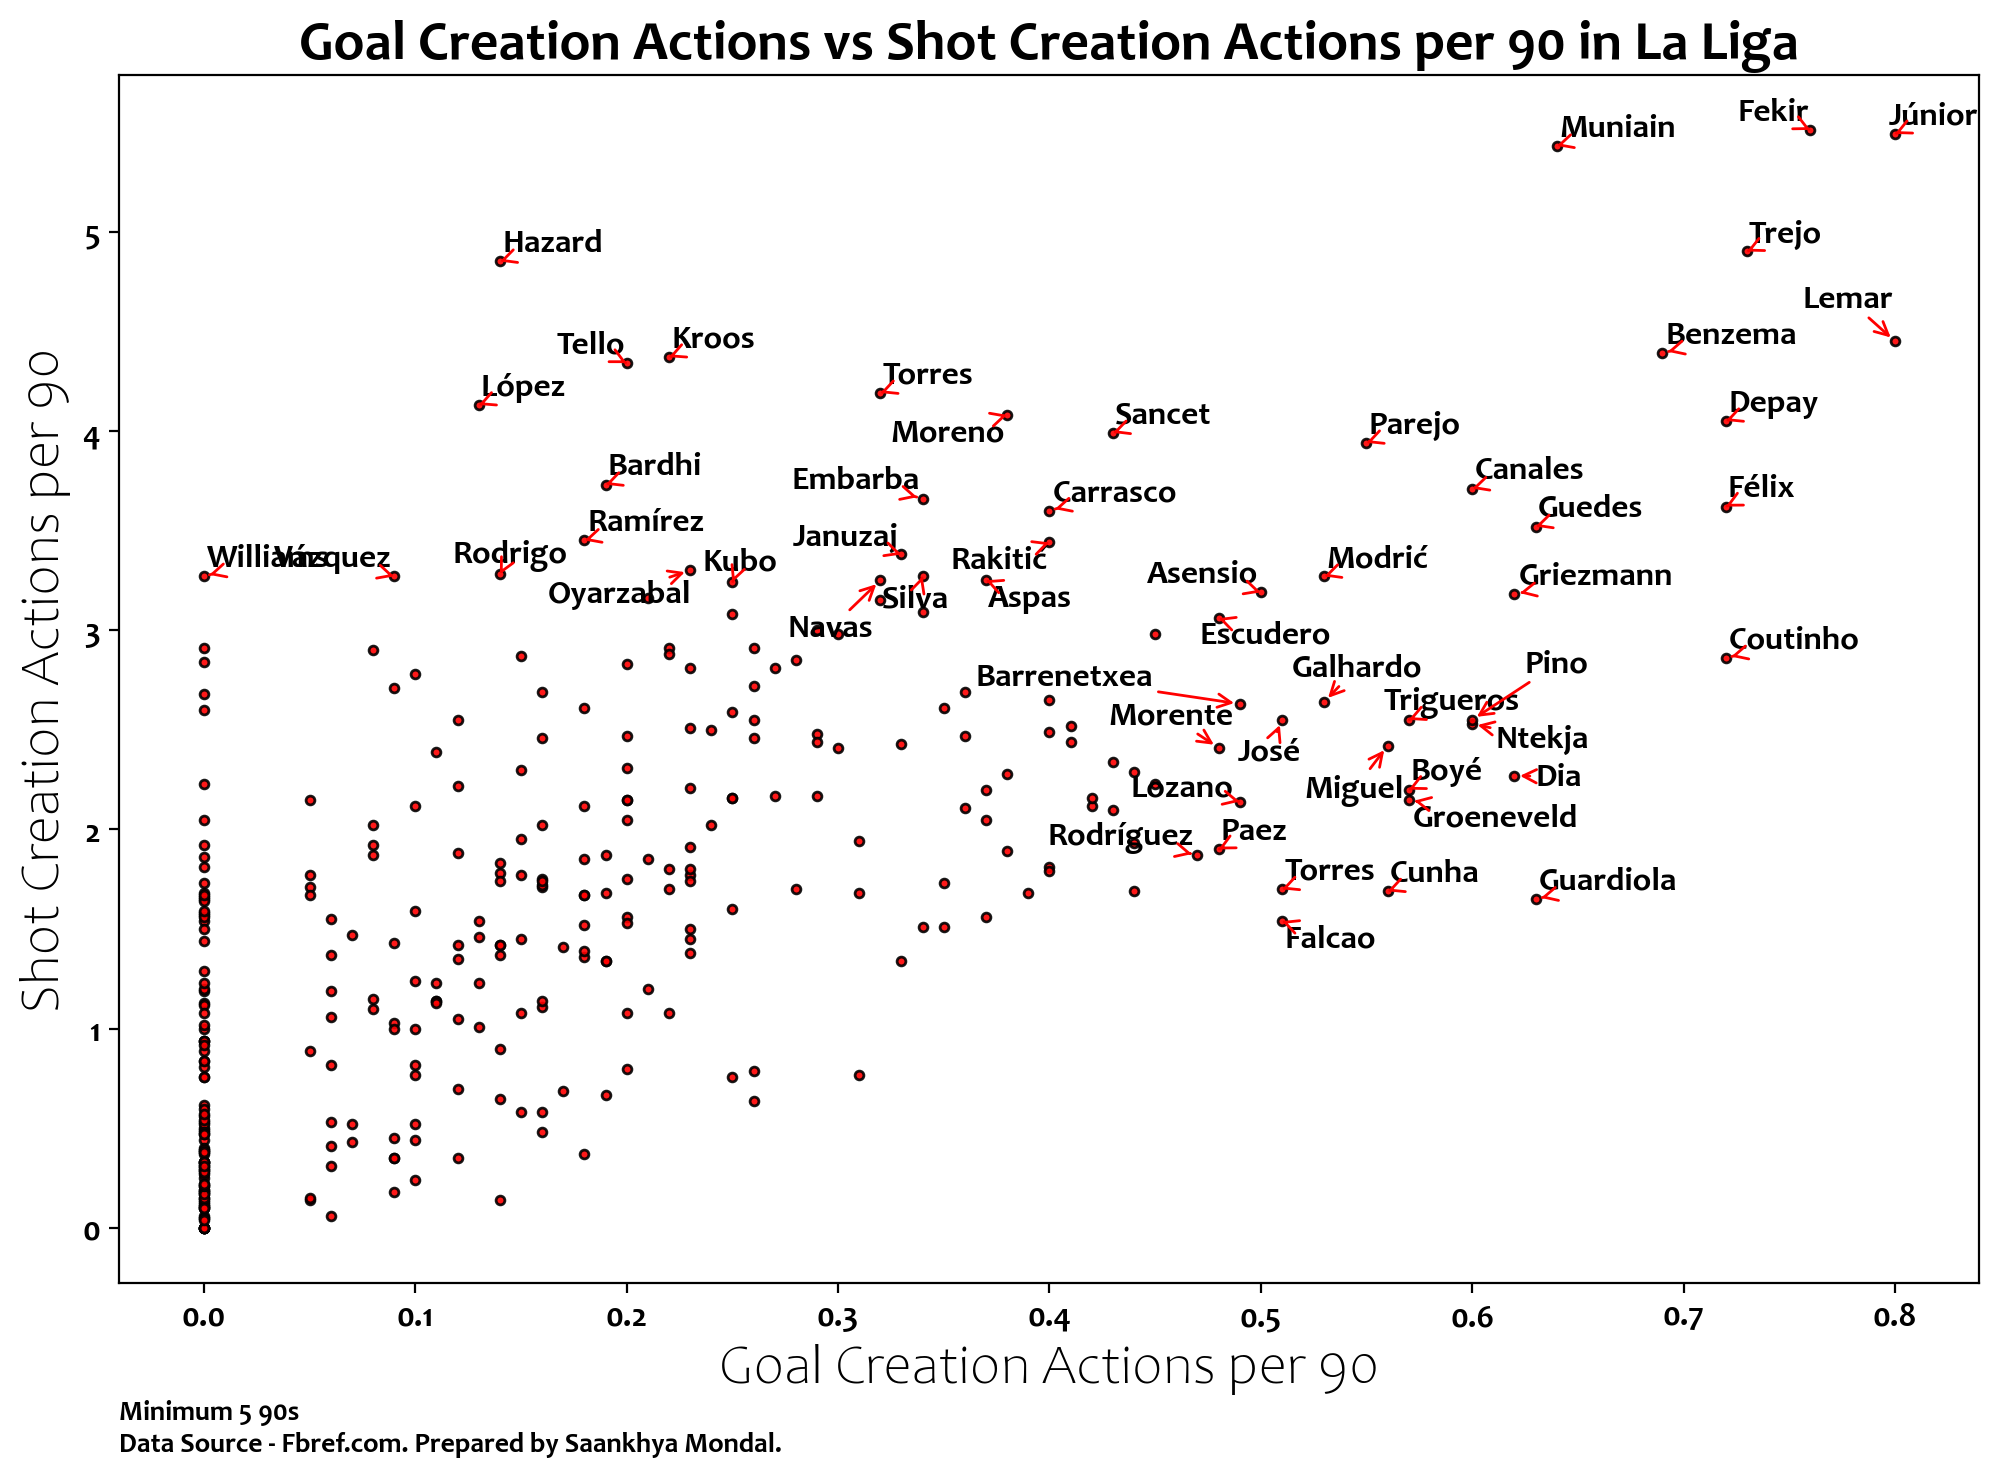

In [9]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[data['Comp'].astype(str).str.contains('es ')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 in La Liga', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [10]:
fig.savefig('Images/GCAp90vsSCAp90_LL.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

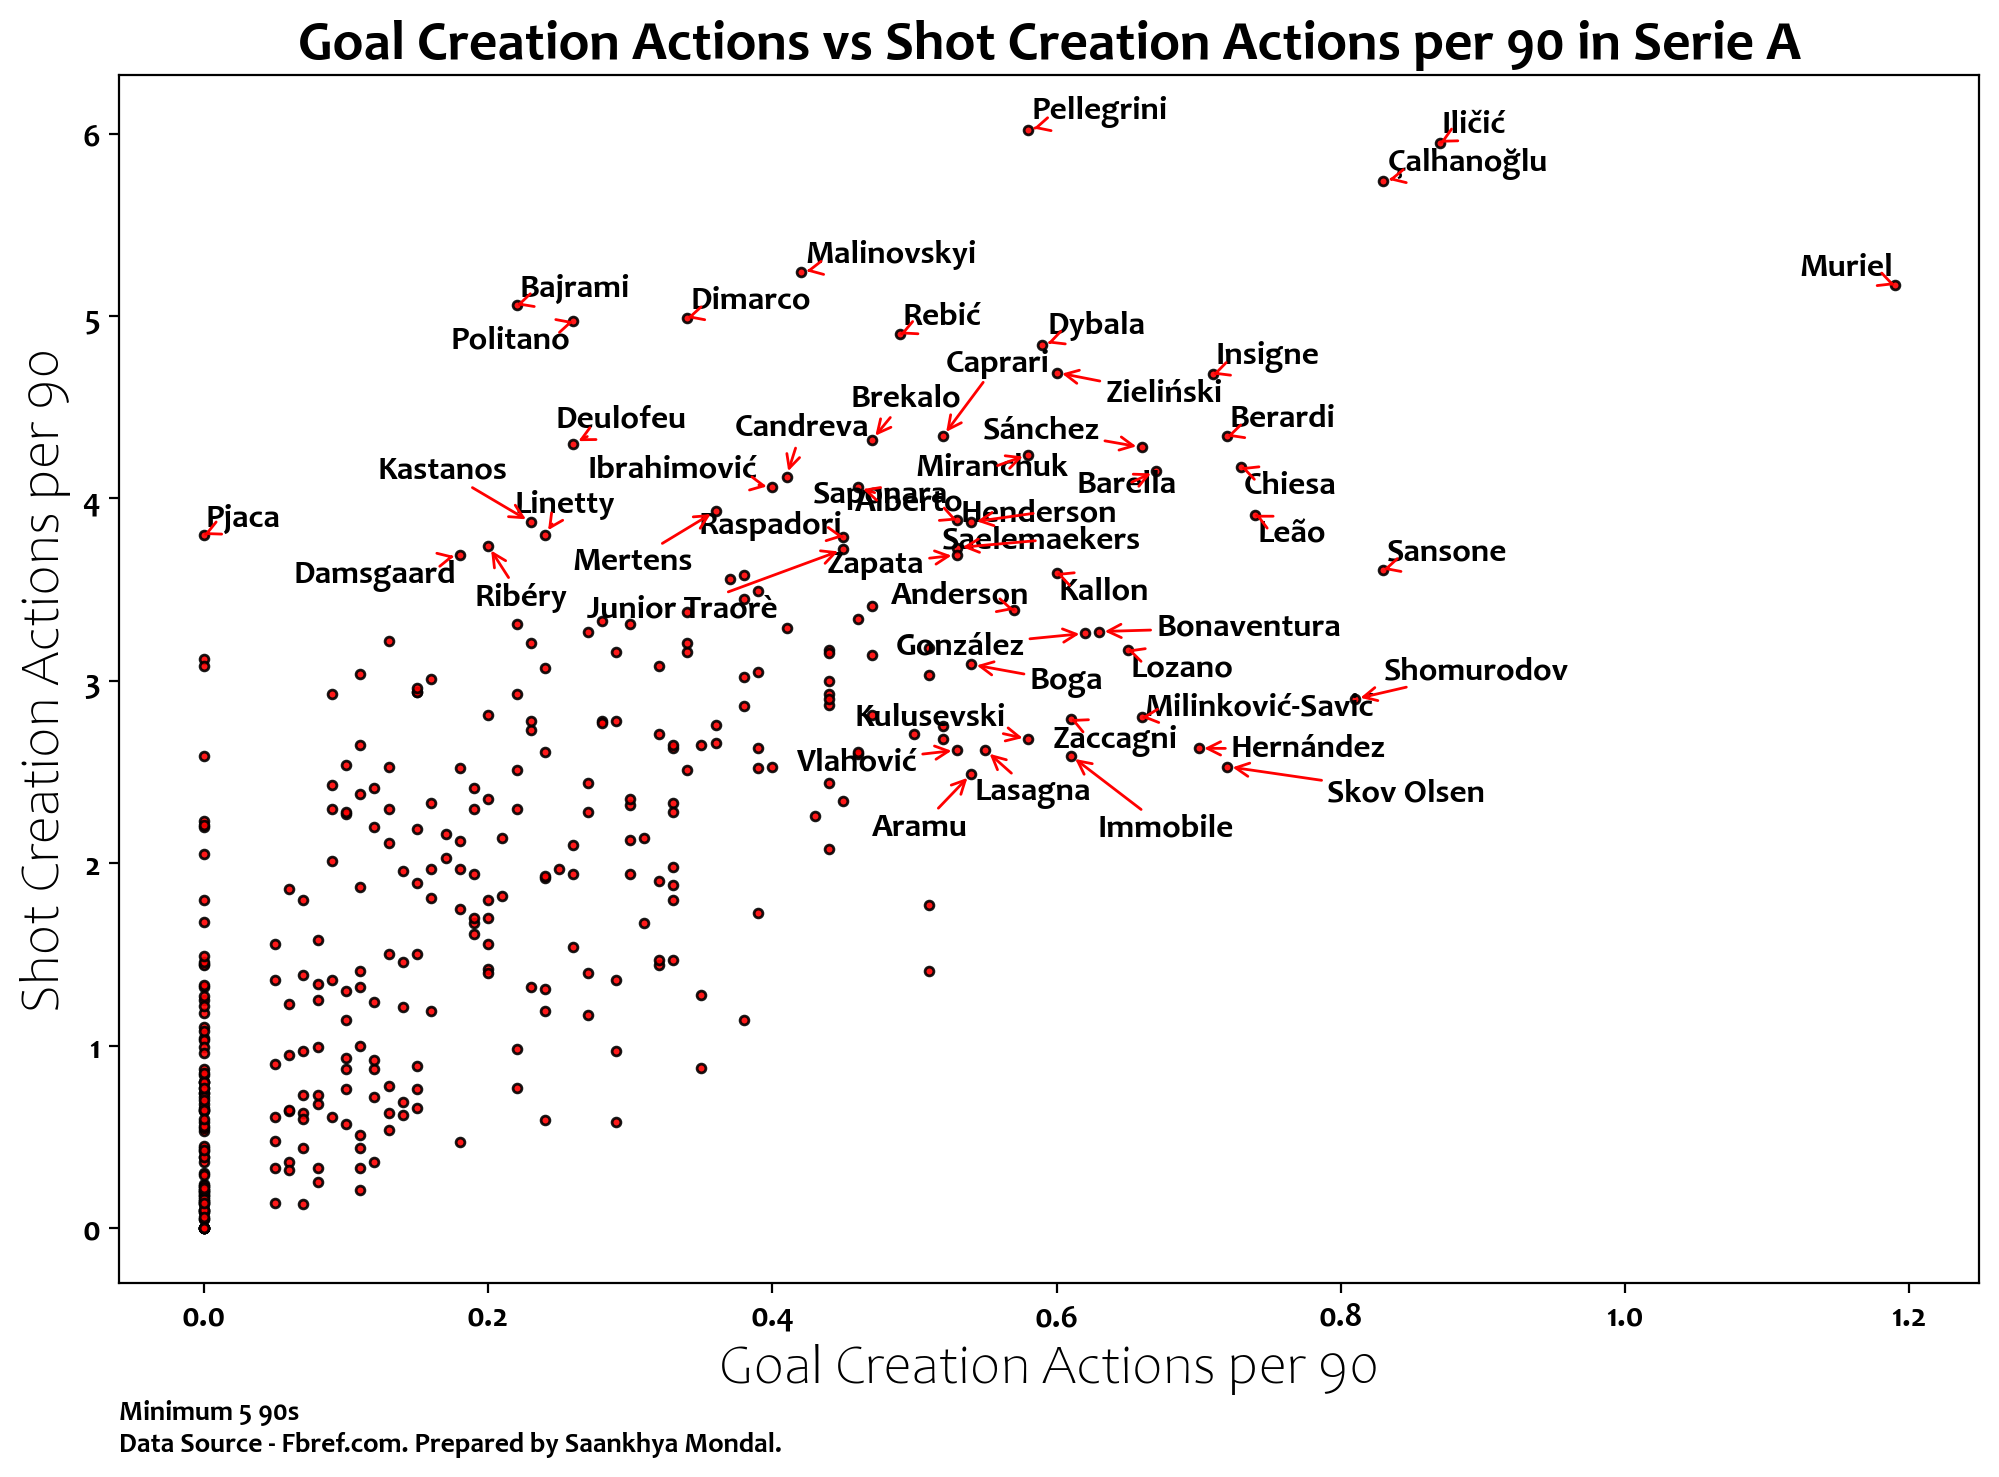

In [11]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[data['Comp'].astype(str).str.contains('it ')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 in Serie A', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

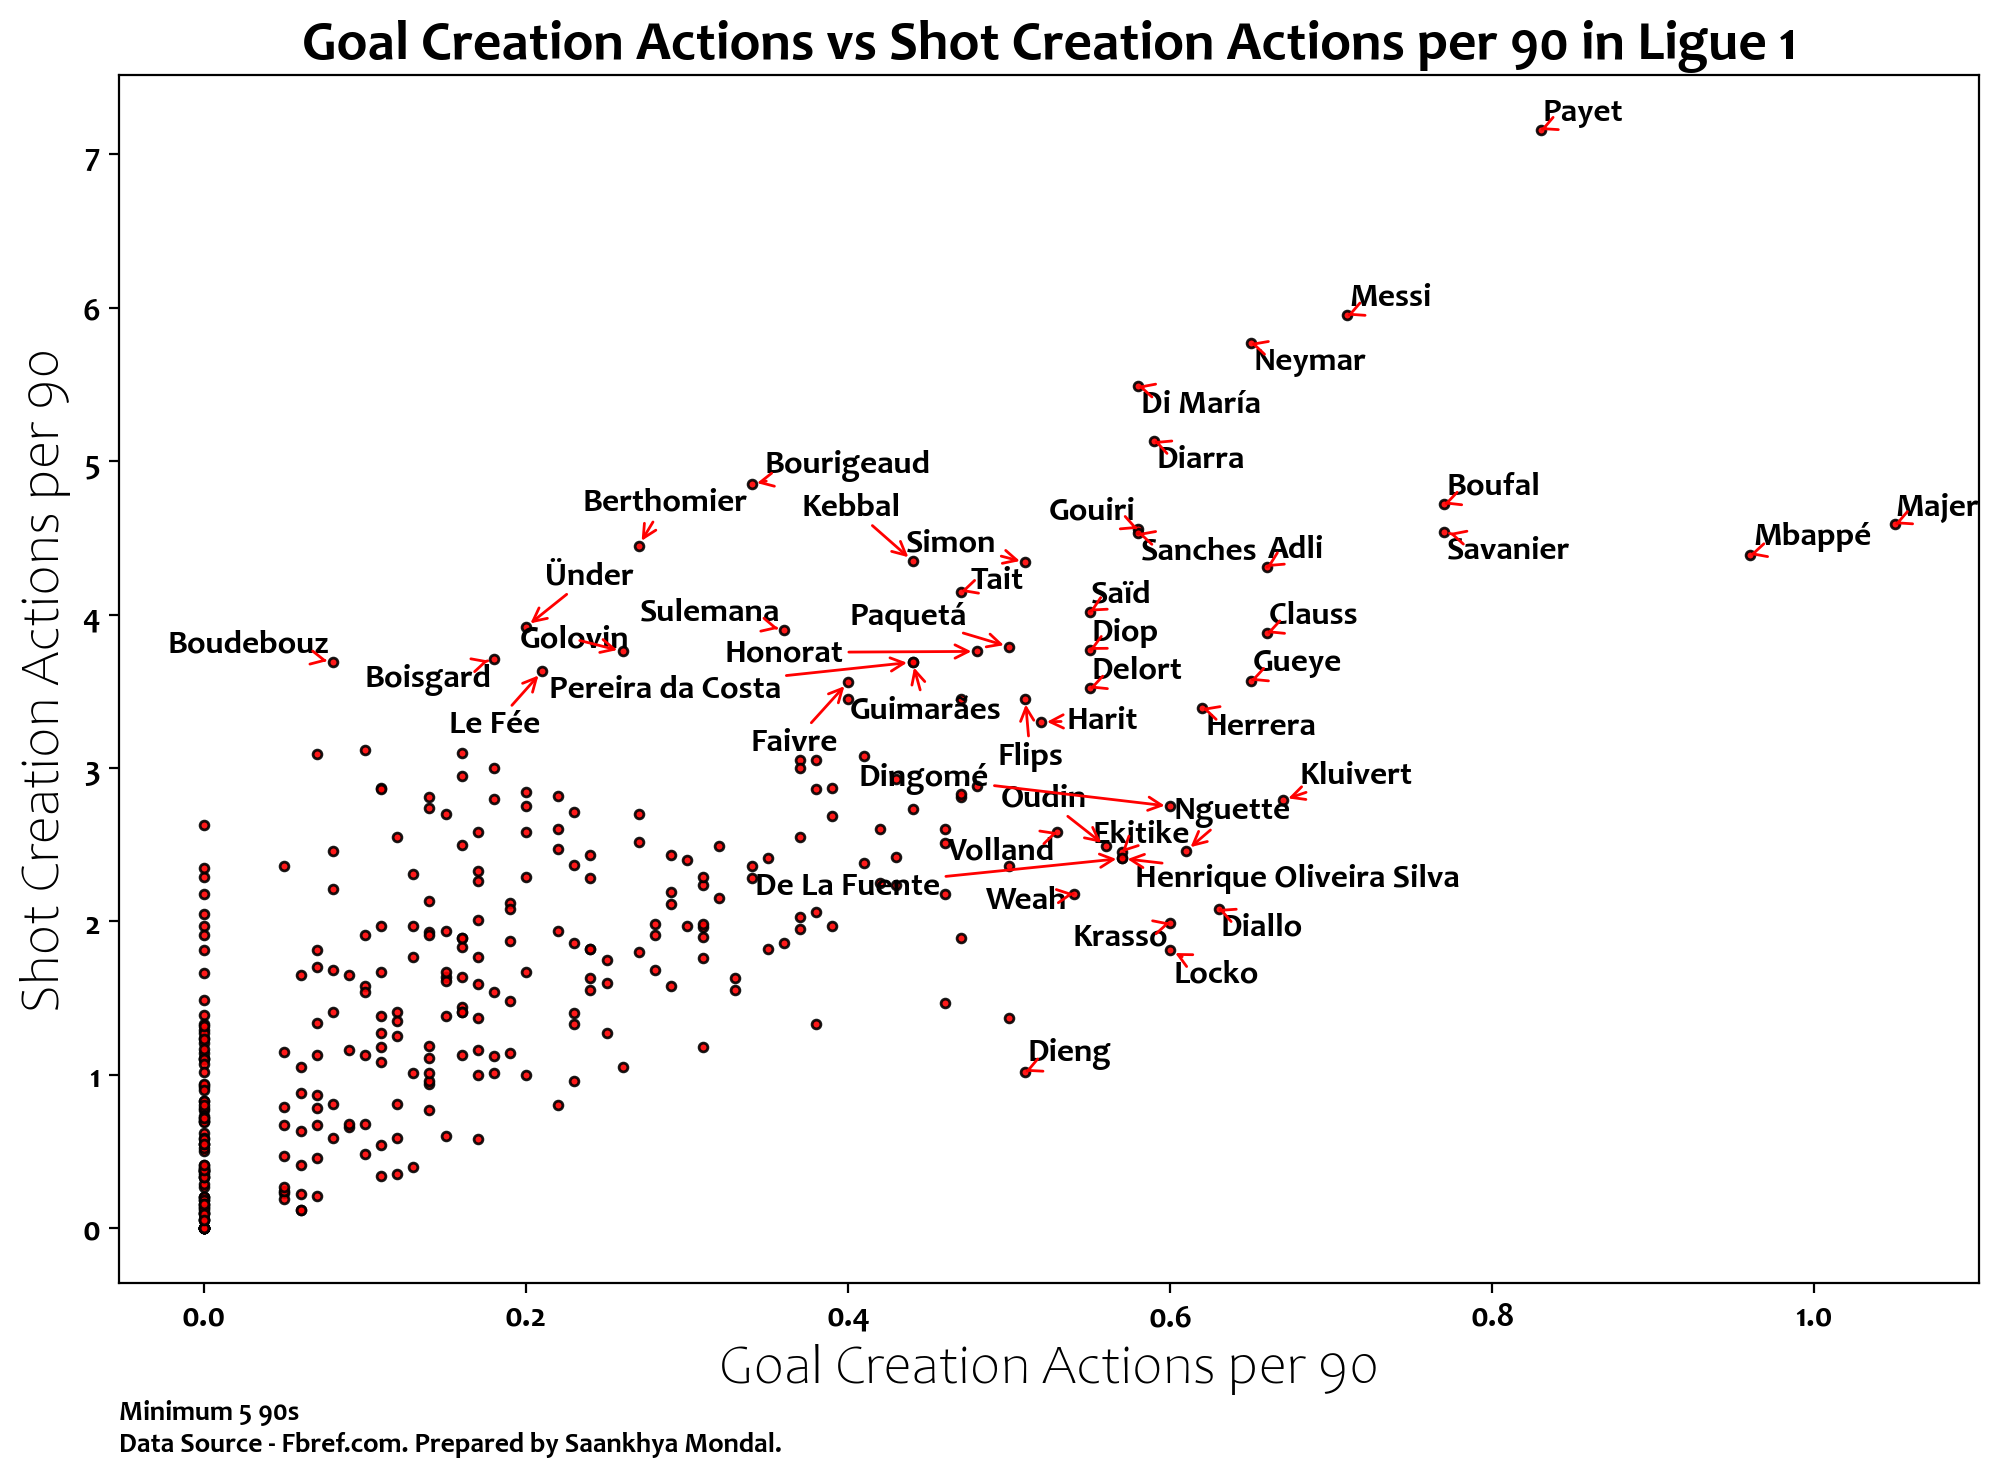

In [12]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[data['Comp'].astype(str).str.contains('fr ')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 in Ligue 1', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

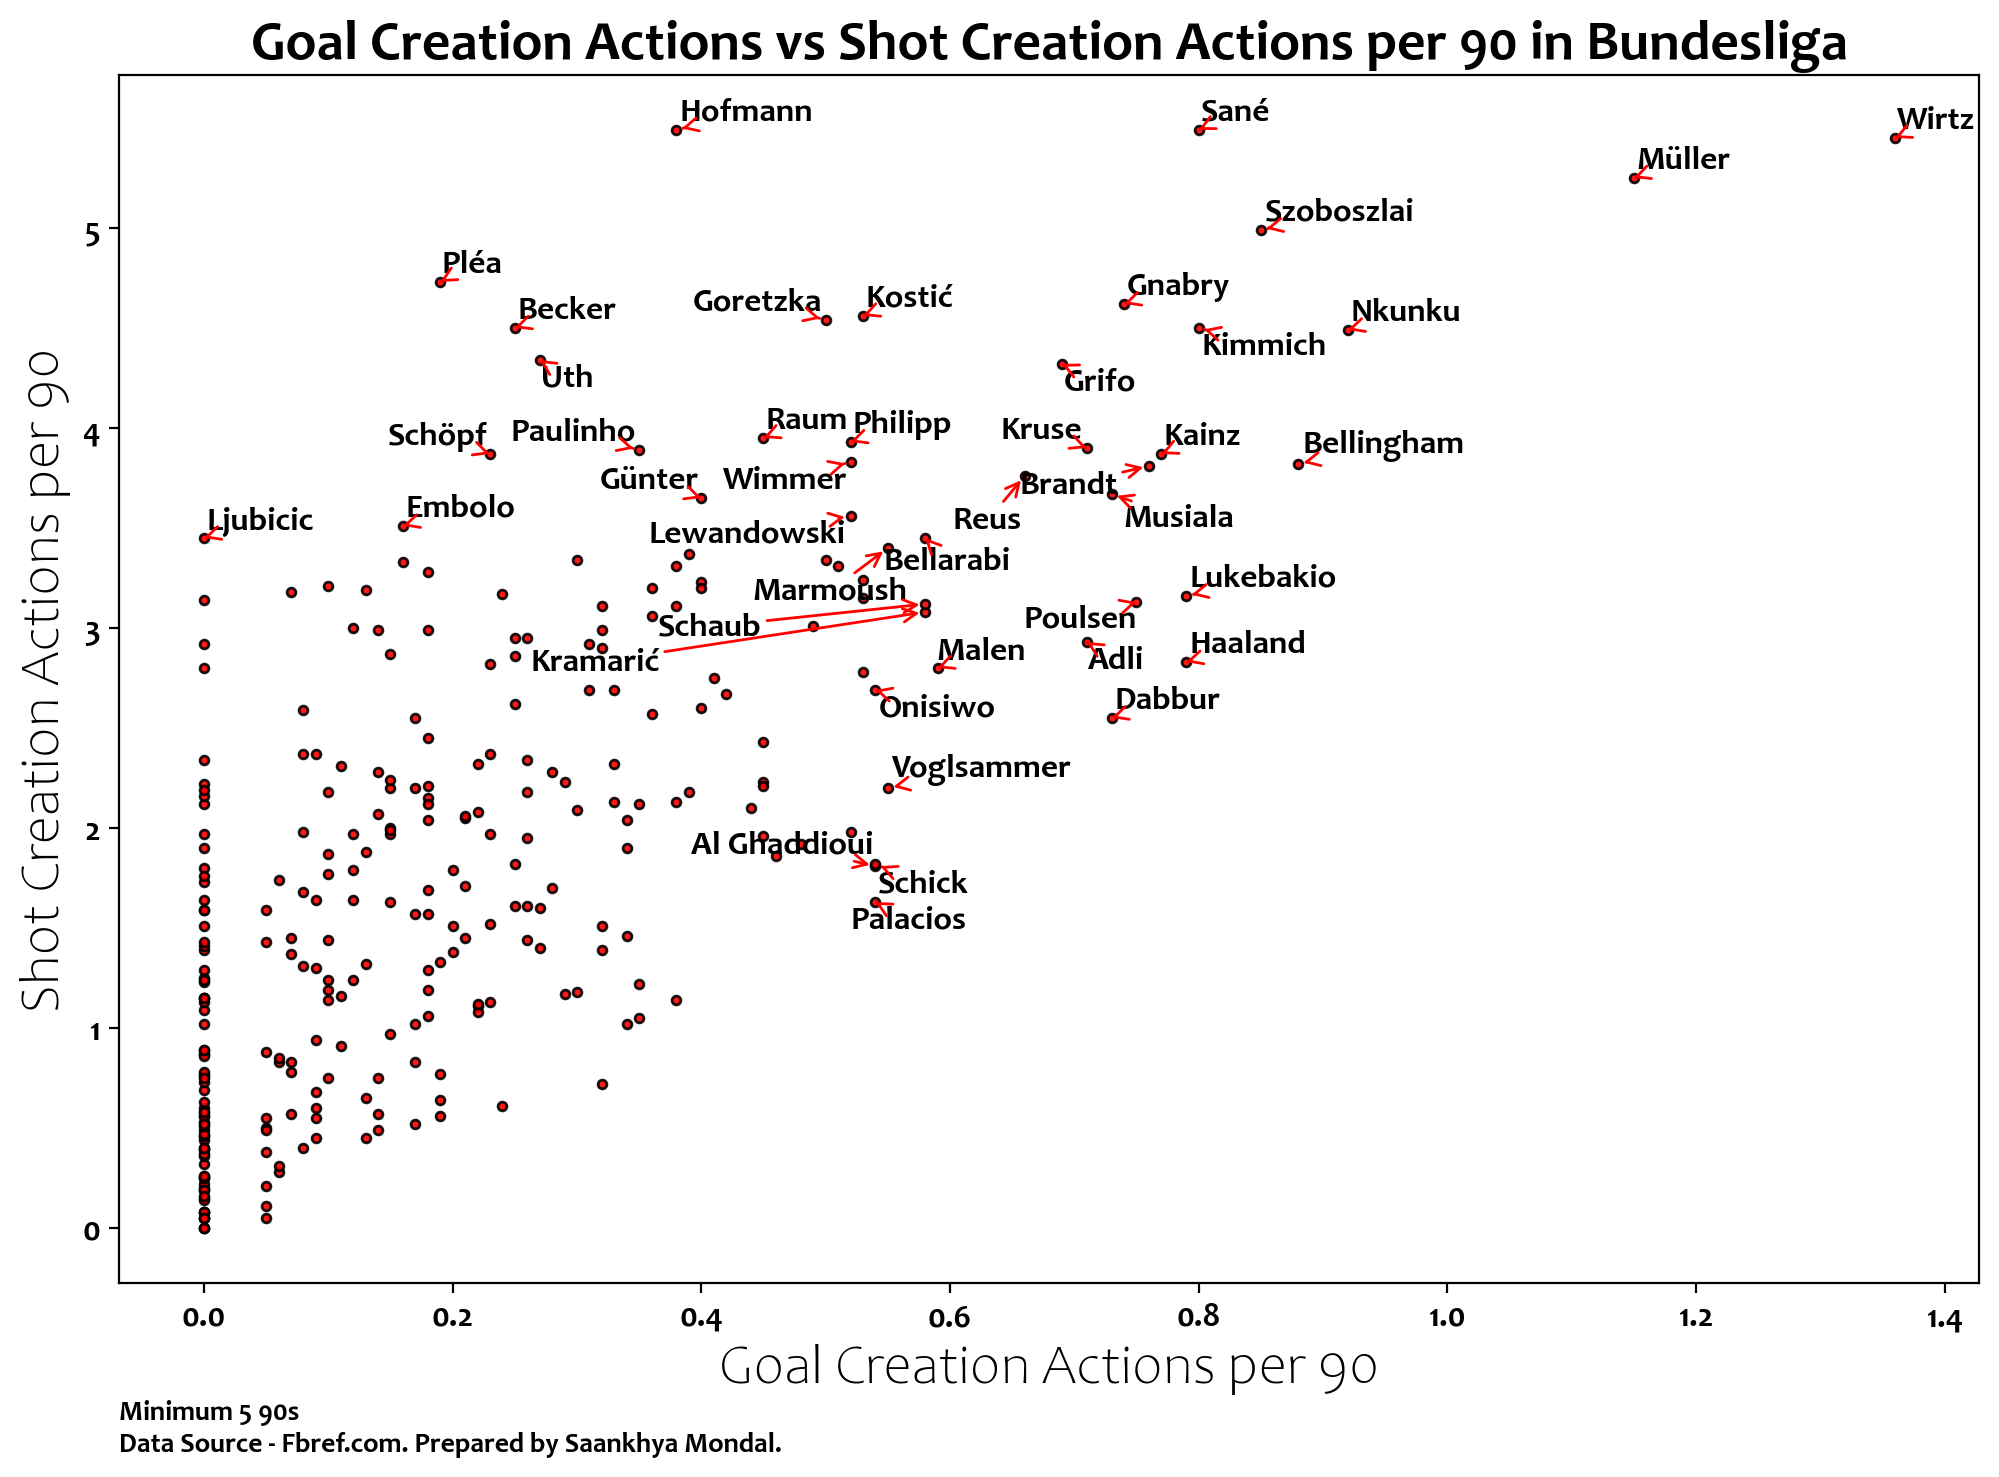

In [13]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[data['Comp'].astype(str).str.contains('de ')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 in Bundesliga', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

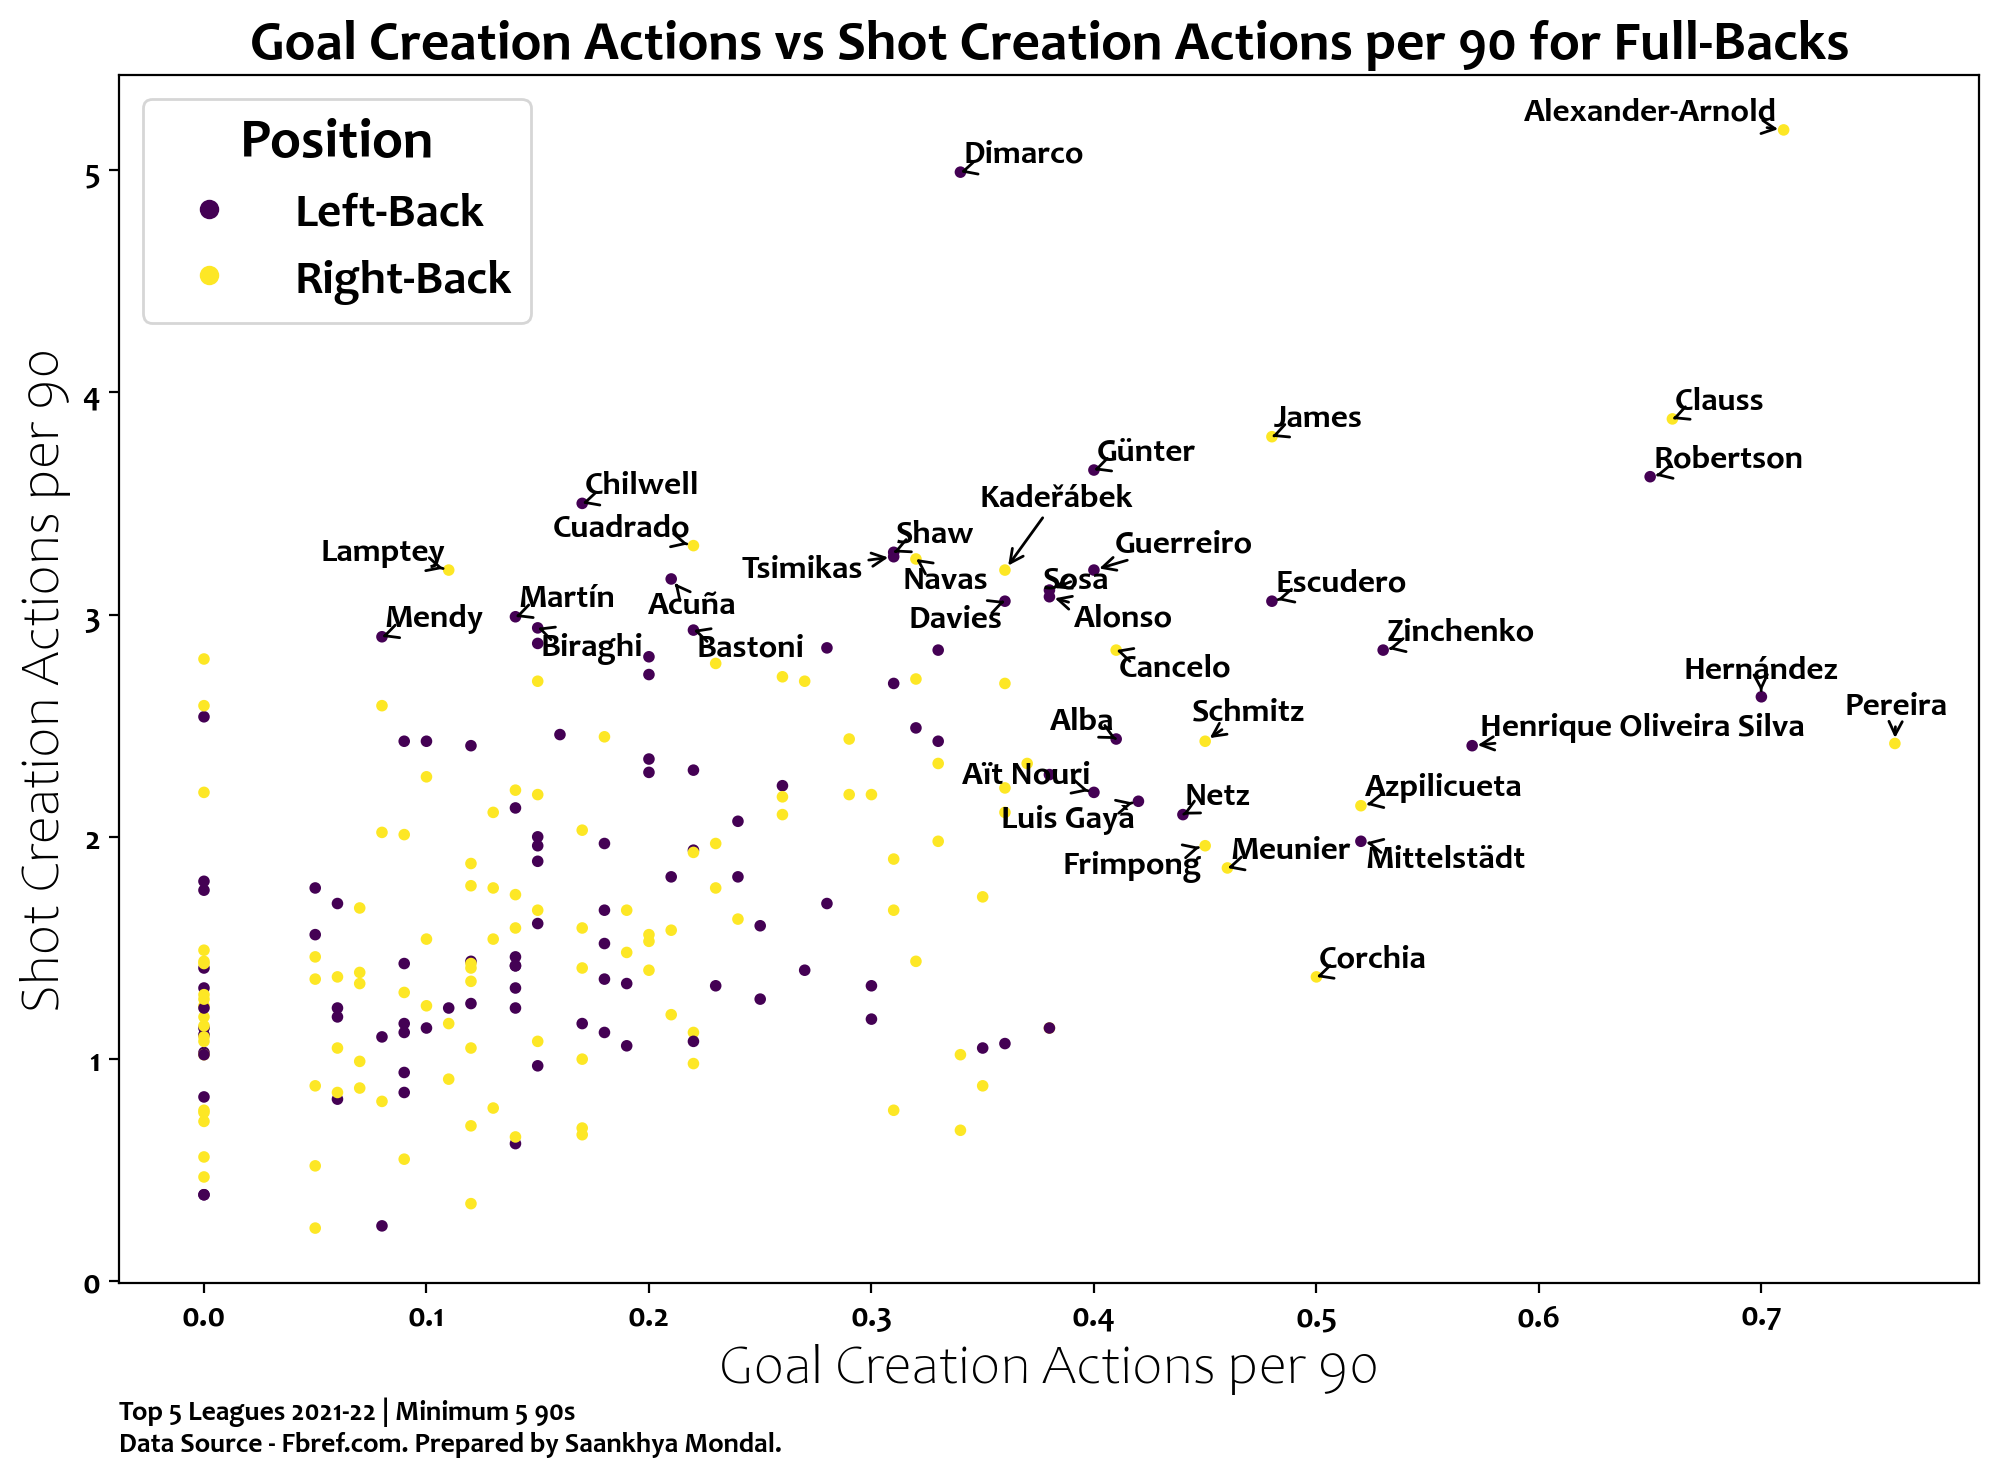

In [15]:
data = pd.merge(player_position, player_data, on='Player')
data = data[data['90s'].astype(float) >= 5.0]
data = data[data['Position'].astype(str).str.contains('t-B')]

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['SCA90'].astype(float).quantile(0.900)
outlier_bottom = data['SCA90'].astype(float).quantile(0.03)
outlier_right = data['GCA90'].astype(float).quantile(0.900)
outlier_left = data['GCA90'].astype(float).quantile(0.03)

par_x = list(data['GCA90'].astype(float))
par_y = list(data['SCA90'].astype(float))

col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))

ax.set_xlabel('Goal Creation Actions per 90', fontsize=20)
ax.set_ylabel('Shot Creation Actions per 90', fontsize=20)
ax.set_title('Goal Creation Actions vs Shot Creation Actions per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Left-Back', 'Right-Back'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [16]:
fig.savefig('Images/GCAp90vsSCAp90_FB.png', dpi=400, bbox_inches='tight')